In [19]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np

In [20]:
DF = pd.DataFrame()
# DF = yf.download(tickers = "AAPL", period = "2021-02-10", interval = "1m")
start = dt.datetime.today() - dt.timedelta(360)
end = dt.datetime.today()
DF = yf.download("AAPL", start, end)

[*********************100%***********************]  1 of 1 completed


# MACD - trend-following momentum indicator
- Moving Average Convergence Divergence
- 12/26/9
- lagging indicator

In [21]:
def MACD(DF, a, b, c):
    df = DF.copy()
    df["MA_FAST"] = df["Adj Close"].ewm(span = a, min_periods = a).mean()
    df["MA_SLOW"] = df["Adj Close"].ewm(span = b, min_periods = b).mean()
    df["MACD"] = df["MA_FAST"] - df["MA_SLOW"]
    df["SIGNAL"] = df["Adj Close"].ewm(span = c, min_periods = c).mean()
    df.dropna(inplace=True)
    df.loc[:, ['Adj Close', 'MACD', 'SIGNAL']].plot(subplots=True, layout = (3,1), grid =True)
    return df

,Open,High,Low,Close,Adj Close,Volume,MA_FAST,MA_SLOW,MACD,SIGNAL
Date,,,,,,,,,,
2020-04-09,67.175003,67.517502,66.175003,66.997498,66.482155,162116400,63.457112,63.137471,0.319641,63.813710
2020-04-13,67.077499,68.425003,66.457497,68.312500,67.787041,131022800,64.130659,63.531170,0.599490,64.610302
2020-04-14,70.000000,72.062500,69.512497,71.762497,71.210495,194994800,65.230092,64.174590,1.055502,65.932899
2020-04-15,70.599998,71.582497,70.157501,71.107498,70.560539,131154400,66.056667,64.704497,1.352170,66.859862
2020-04-16,71.845001,72.050003,70.587502,71.672501,71.121201,157125200,66.841050,65.232255,1.608794,67.713186
...,...,...,...,...,...,...,...,...,...,...
2021-02-22,128.009995,129.720001,125.599998,126.000000,126.000000,103607600,132.090566,132.756873,-0.666306,131.347667
2021-02-23,123.760002,126.709999,118.389999,125.860001,125.860001,157859100,131.132018,132.245993,-1.113976,130.250134
2021-02-24,124.940002,125.559998,122.230003,125.349998,125.349998,110691500,130.242476,131.735179,-1.492703,129.270107


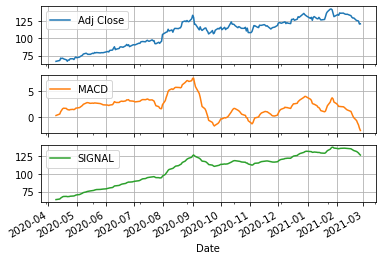

In [22]:
MACD(DF, 12,26,9)

# SMA
- simple moving average

In [23]:
def SMA(DF, n):
    copy = DF.copy()
    sma = copy.rolling(window=n, min_periods=n).mean() # this will get average of 1 day for the ealier values
    sma = sma.dropna(inplace=True)
    return sma

# Bollinger Band and ADR - Volatility 
- n = 20

In [85]:
# Function to calculate true range and average true range
def ATR(DF, n):
    df = pd.DataFrame() 
    df = DF.copy()
    df["H-L"] = abs(df["High"] - df["Low"]).shift(1)
    df["H-PC"] = abs(df["High"] - df["Adj Close"]).shift(1)
    df["L-PC"] = abs(df["Low"] - df["Adj Close"]).shift(1)
    df["TR"] = df[["H-L", "H-PC", "L-PC"]].max(axis=1, skipna=False)
    df["ATR"] = df["TR"].rolling(n).mean()
    df = df.drop(["H-L", "H-PC", "L-PC"], axis=1)
    return df

In [86]:
ATR(DF, 20)

,Open,High,Low,Close,Adj Close,Volume,TR,ATR
Date,,,,,,,,
2020-03-05,73.879997,74.887497,72.852501,73.230003,72.666725,187572800,NaN,NaN
2020-03-06,70.500000,72.705002,70.307503,72.257500,71.701706,226176800,2.220772,NaN
2020-03-09,65.937500,69.522499,65.750000,66.542503,66.030655,286744800,2.397499,NaN
2020-03-10,69.285004,71.610001,67.342499,71.334999,70.786301,285290000,3.772499,NaN
2020-03-11,69.347504,70.305000,67.964996,68.857498,68.327858,255598800,4.267502,NaN
...,...,...,...,...,...,...,...,...
2021-02-22,128.009995,129.720001,125.599998,126.000000,126.000000,103607600,1.910004,3.314502
2021-02-23,123.760002,126.709999,118.389999,125.860001,125.860001,157859100,4.120003,3.279002
2021-02-24,124.940002,125.559998,122.230003,125.349998,125.349998,110691500,8.320000,3.267502


In [26]:
def BollBnd(DF, n):
    df = DF.copy()
    df["MA"] = df["Adj Close"].rolling(n).mean()
    df["BB_UP"] = df["MA"] + 2*df["MA"].rolling(n).std()
    df["BB_DOWN"] = df["MA"] - 2*df["MA"].rolling(n).std()
    df["BB_RANGE"] = df["BB_UP"] - df["BB_DOWN"]
    df.dropna(inplace=True)
    return df
    

In [27]:
BollBnd(DF,10)

,Open,High,Low,Close,Adj Close,Volume,MA,BB_UP,BB_DOWN,BB_RANGE
Date,,,,,,,,,,
2020-03-31,63.900002,65.622498,63.000000,63.572498,63.083504,197002000,60.846844,64.961245,56.732442,8.228803
2020-04-01,61.625000,62.180000,59.782501,60.227501,59.764240,176218400,60.703952,63.821434,57.586470,6.234965
2020-04-02,60.084999,61.287498,59.224998,61.232498,60.761501,165934000,60.707673,62.796670,58.618676,4.177995
2020-04-03,60.700001,61.424999,59.742500,60.352501,59.888275,129880000,61.009583,62.308107,59.711058,2.597049
2020-04-06,62.724998,65.777496,62.345001,65.617500,65.112770,201820400,61.954755,62.891469,61.018042,1.873427
...,...,...,...,...,...,...,...,...,...,...
2021-02-22,128.009995,129.720001,125.599998,126.000000,126.000000,103607600,132.842000,134.982489,130.701510,4.280979
2021-02-23,123.760002,126.709999,118.389999,125.860001,125.860001,157859100,131.737000,134.427556,129.046443,5.381113
2021-02-24,124.940002,125.559998,122.230003,125.349998,125.349998,110691500,130.671000,134.110597,127.231403,6.879194


# RSI - Relative Strength Indicator
- momentum ocsilator which measures
- its strength against its past value(???)
- developed country: 30(buy)/70(sell)
- emerging market: 20/80
- n = 14

In [28]:
def RSI(DF, n):
    df = DF.copy()
    print(len(df))
    df["delta"] = df["Adj Close"] - df["Adj Close"].shift(1)
    df["gain"] = np.where(df["delta"]>=0, df["delta"], 0)
    df["loss"] = np.where(df["delta"]<0, abs(df["delta"]), 0)
    avg_gain = []
    avg_loss = []
    gain = df["gain"].tolist()
    loss = df["loss"].tolist()
    for i in range(len(df)):
        if i < n:
            avg_gain.append(np.NaN)
            avg_loss.append(np.NaN)
        elif i == n:
            avg_gain.append(df["gain"].rolling(n).mean().tolist()[n])
            avg_loss.append(df["loss"].rolling(n).mean().tolist()[n])
        elif i > n:
            avg_gain.append((avg_gain[i - 1]*(n - 1) + gain[i])/n)
            avg_loss.append((avg_loss[i - 1]*(n - 1) + loss[i])/n)
    df["avg_gain"] = np.array(avg_gain)

    df["avg_loss"] = np.array(avg_loss)
    df["RS"] = df["avg_gain"]/df["avg_loss"]
    df["RSI"] = 100 - (100/(1+df["RS"]))
    return df["RSI"]
        

In [29]:
RSI(DF, 14)

248


Date
2020-03-05          NaN
2020-03-06          NaN
2020-03-09          NaN
2020-03-10          NaN
2020-03-11          NaN
                ...    
2021-02-22    35.422594
2021-02-23    35.208527
2021-02-24    34.393128
2021-02-25    28.348703
2021-02-26    29.178774
Name: RSI, Length: 248, dtype: float64

# ADX(Average Direactional Index)
- 0~100
- 0~25: weak
- 25~50: strong
- 50~75: very strong
- 75~100: extremely strong
- non-directional

In [93]:
def ADX(DF, n):
    df2 = DF.copy()
    df2["TR"] = ATR(df2, n)["TR"]
    df2["DMplus"] = np.where((df2["High"] - df2["High"].shift(1))>(df2["Low"].shift(1)-df2["Low"]), 
                             df2["High"] - df2["High"].shift(1),
                             0)
    df2["DMplus"] = np.where(df2["DMplus"]<0, 0, df2["DMplus"])
    df2["DMminus"] = np.where((df2["Low"].shift(1)-df2["Low"])>(df2["High"] - df2["High"].shift(1)),
                             df2["Low"].shift(1)-df2["Low"],
                             0)
    df2["DMminus"] = np.where(df2["DMminus"]<0, 0, df2["DMminus"])
    TRn=[]
    DMplusN=[]
    DMminusN=[]
    TR = df2["TR"].tolist()
    DMplus = df2['DMplus'].tolist()
    DMminus = df2['DMminus'].tolist()
    for i in range(len(df2)):
        if i<n:
            TRn.append(np.NaN)
            DMplusN.append(np.NaN)
            DMminusN.append(np.NaN)
        elif i == n:
            TRn.append(df2["TR"].rolling(n).sum().tolist()[n])
            DMplusN.append(df2["DMplus"].rolling(n).sum().tolist()[n])
            DMminusN.append(df2["DMminus"].rolling(n).sum().tolist()[n])
        else:
            TRn.append(TRn[i-1] - (TRn[i-1]/14) + TR[i])
            DMplusN.append(DMplusN[i-1] - (DMplusN[i-1]/14) + DMplus[i])
            DMminusN.append(DMminusN[i-1] - (DMminusN[i-1]/14) + DMminus[i])
            
    df2["TRn"] = np.array(TRn)
    df2["DMplusN"] = np.array(DMplusN)
    df2["DMminusN"] = np.array(DMminusN)
    df2["DIplusN"] = (100*df2["DMplusN"]/df2["TRn"])
    df2["DIminusN"] = (100*df2["DMminusN"]/df2["TRn"])
    df2["DIsum"] =  df2["DIplusN"] + df2["DIminusN"] 
    df2["DIdiff"] =  abs(df2["DIplusN"] - df2["DIminusN"])
    df2["DX"] = 100*(df2["DIdiff"]/df2["DIsum"])
    ADX = []
    DX = df2["DX"].tolist()
    for j in range(len(df2)):
        if j < 2*n-1:
            ADX.append(np.NaN)
        elif j == 2*n-1:
            ADX.append(df2["DX"][j-n+1: j+1].mean())
        elif j > 2*n-1:
            ADX.append(((n - 1)*ADX[j-1] + DX[j])/n)
    df2["ADX"] =np.array(ADX)
    return df2["ADX"]
            
    

In [94]:
ADX(DF, 14)

Date
2020-03-05          NaN
2020-03-06          NaN
2020-03-09          NaN
2020-03-10          NaN
2020-03-11          NaN
                ...    
2021-02-22    15.952481
2021-02-23    18.527729
2021-02-24    20.919031
2021-02-25    23.355329
2021-02-26    25.617606
Name: ADX, Length: 248, dtype: float64